In [1]:
import matplotlib as mt
import pandas as pd 
import numpy as np


In [2]:
%matplotlib inline

In [3]:
GLT=pd.read_csv('https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv')

In [4]:
GLT.head(10)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
GLT.columns

Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
GLT.dtypes

Date                              object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

#First question: Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many
continuous or discrete?


Answer:
The City and Country are nominal data because they are labels.

The AverageTemperature	and AverageTemperatureUncertainty are continuos data.

The Date is a countinue data because has a cronological timestep.

The Latitude and Longitude are continuos data.

##Second point

Analyze the attribute AverageTemperature, which contains missing values. Fill any gap with the
arithmetic mean among the closest antecedent and the closest successive measurements in time,
taken in the same city

In [7]:
GLT.nunique()

Date                              2352
AverageTemperature               49920
AverageTemperatureUncertainty     5287
City                               100
Country                             49
Latitude                            49
Longitude                           93
dtype: int64

In [8]:
GLT.isna().sum()

Date                                 0
AverageTemperature               27581
AverageTemperatureUncertainty    27581
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [9]:
GLT[GLT['AverageTemperature'].isna()]

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2,1849-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
23,1850-12-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
24,1851-01-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
28,1851-05-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
217495,1839-09-01,NaN,NaN,Xian,China,34.56N,108.97E
217496,1839-10-01,NaN,NaN,Xian,China,34.56N,108.97E
217497,1839-11-01,NaN,NaN,Xian,China,34.56N,108.97E
217498,1839-12-01,NaN,NaN,Xian,China,34.56N,108.97E


In [10]:
GLT_copy=GLT['AverageTemperature'].copy()

In [11]:
GLT_copy

0         26.704
1         27.434
2            NaN
3         26.140
4         25.427
           ...  
219570    23.885
219571    17.028
219572    12.399
219573     4.736
219574    -0.822
Name: AverageTemperature, Length: 219575, dtype: float64

In [12]:
def convertir(a):
    a.fillna('z',inplace=True)
    for i in range(len(a)):
        if a[i]=='z':
            if a[i-1]!='z':
                mean=np.mean(a[:i])
                a[i]=mean


In [13]:
convertir(GLT_copy)

In [14]:
GLT['AverageTemperature']=GLT_copy

In [15]:
GLT['AverageTemperature'].isna().sum()

0

In [16]:
GLT_copy_2=GLT['AverageTemperatureUncertainty'].copy()

In [17]:
convertir(GLT_copy_2)

In [18]:
GLT['AverageTemperatureUncertainty']=GLT_copy_2

In [19]:
GLT['AverageTemperatureUncertainty'].isna().sum()

0

##Third point

Define a function that, given the name of a city and an integer N > 0, prints:
(a) the top N hottest measurements;
(b) the top N coldest measurements.


In [20]:
GLT

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,27.069,1.3985,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.14,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.2,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
219570,2012-08-01,23.885,0.435,Xian,China,34.56N,108.97E
219571,2012-09-01,17.028,1.405,Xian,China,34.56N,108.97E
219572,2012-10-01,12.399,0.526,Xian,China,34.56N,108.97E
219573,2012-11-01,4.736,0.519,Xian,China,34.56N,108.97E


In [21]:
GLT[GLT['City']=='Xian'].sort_values(['AverageTemperature'],ascending=False).head(10)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
218585,1930-07-01,26.762,0.418,Xian,China,34.56N,108.97E
218933,1959-07-01,26.741,0.541,Xian,China,34.56N,108.97E
218729,1942-07-01,26.663,0.491,Xian,China,34.56N,108.97E
218609,1932-07-01,26.544,2.924,Xian,China,34.56N,108.97E
218633,1934-07-01,26.411,0.781,Xian,China,34.56N,108.97E
219077,1971-07-01,26.292,0.366,Xian,China,34.56N,108.97E
219437,2001-07-01,26.094,0.101,Xian,China,34.56N,108.97E
218549,1927-07-01,26.004,0.992,Xian,China,34.56N,108.97E
219497,2006-07-01,25.957,0.727,Xian,China,34.56N,108.97E
219365,1995-07-01,25.908,0.332,Xian,China,34.56N,108.97E


In [22]:
GLT[GLT['City']=='Xian'].sort_values(['AverageTemperature'],ascending=True).head(10)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
218579,1930-01-01,-6.418,1.819,Xian,China,34.56N,108.97E
218063,1887-01-01,-5.566,1.562,Xian,China,34.56N,108.97E
217763,1862-01-01,-5.484,2.241,Xian,China,34.56N,108.97E
218878,1954-12-01,-5.421,0.525,Xian,China,34.56N,108.97E
218879,1955-01-01,-5.388,0.887,Xian,China,34.56N,108.97E
218219,1900-01-01,-5.322,1.555,Xian,China,34.56N,108.97E
219143,1977-01-01,-5.303,0.468,Xian,China,34.56N,108.97E
217955,1878-01-01,-4.926,2.87,Xian,China,34.56N,108.97E
219551,2011-01-01,-4.811,0.559,Xian,China,34.56N,108.97E
217751,1861-01-01,-4.766,1.843,Xian,China,34.56N,108.97E


In [34]:
def measurements(GLT=GLT):
    N,c=int(input("Write the integer")),str(input("Write the city"))
    a=GLT[GLT['City']==c].sort_values(['AverageTemperature'],ascending=False).head(N)
    b=GLT[GLT['City']==c].sort_values(['AverageTemperature'],ascending=True).head(N)
    return (f"The top {N} hottest measurements of {c} are :" , a, f"The top {N} coldest measurements of {c} are :", b)


In [35]:
measurements()

('The top 5 hottest measurements of Xian are :',
               Date AverageTemperature AverageTemperatureUncertainty  City  \
 218585  1930-07-01             26.762                         0.418  Xian   
 218933  1959-07-01             26.741                         0.541  Xian   
 218729  1942-07-01             26.663                         0.491  Xian   
 218609  1932-07-01             26.544                         2.924  Xian   
 218633  1934-07-01             26.411                         0.781  Xian   
 
        Country Latitude Longitude  
 218585   China   34.56N   108.97E  
 218933   China   34.56N   108.97E  
 218729   China   34.56N   108.97E  
 218609   China   34.56N   108.97E  
 218633   China   34.56N   108.97E  ,
 'The top 5 coldest measurements of Xian are :',
               Date AverageTemperature AverageTemperatureUncertainty  City  \
 218579  1930-01-01             -6.418                         1.819  Xian   
 218063  1887-01-01             -5.566               

4. (*) Let’s search for other anomalies in data distribution with the help of matplotlib. Plot the distribution of the average land temperatures for Rome and Bangkok using the aforementioned histogram plotting function.

Info: calling the plt.hist() method twice will draw the second histogram onto the canvas generated by the first call.


As you can see, Rome and Bangkok have very different temperature distributions, but this seems
plausible. What it looks strange is the large difference in their temperatures’ magnitude. Is it possible
that all sensors from Bangkok stations, along the entire time-span, were faulty? Could they were
configured to use another representation of the temperature measurement? Can you figure out a
data cleaning step to solve it?
Before continuing, try to answer to these questions.


In [58]:
from random import gauss
import matplotlib.pyplot as plt
ma_Rome=GLT[GLT['City']=='Rome']['AverageTemperature']
ma_Bangkok=GLT[GLT['City']=='Bangkok']['AverageTemperature']

In [59]:
average=np.mean(GLT[GLT['City']=='Rome']['AverageTemperature'])


((array([ 79., 257., 279., 272., 247., 251., 253., 352., 328.,  30.]),
  array([ 3.1106 ,  5.02662,  6.94264,  8.85866, 10.77468, 12.6907 ,
         14.60672, 16.52274, 18.43876, 20.35478, 22.2708 ]),
  <BarContainer object of 10 artists>),
 (array([ 97.,  13.,   0.,  26.,   5., 182.,  86., 651., 402., 886.]),
  array([21.18731553, 27.69594398, 34.20457243, 40.71320087, 47.22182932,
         53.73045777, 60.23908621, 66.74771466, 73.25634311, 79.76497155,
         86.2736    ]),
  <BarContainer object of 10 artists>))

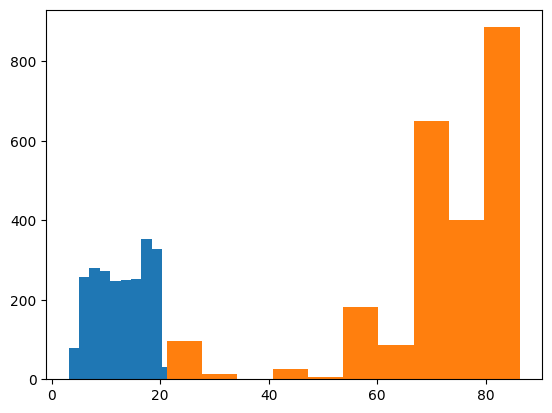

In [61]:
window_size = 5  # Size of the window to the moving avarage
moving_avg_R = np.convolve(ma_Rome, np.ones(window_size)/window_size, mode='valid')
moving_avg_B = np.convolve(ma_Bangkok, np.ones(window_size)/window_size, mode='valid')
plt.hist(moving_avg_R),plt.hist(moving_avg_B)


((array([ 42., 259., 326., 285., 203., 216., 188., 497., 297.,  39.]),
  array([-1.441 ,  1.2982,  4.0374,  6.7766,  9.5158, 12.255 , 14.9942,
         17.7334, 20.4726, 23.2118, 25.951 ]),
  <BarContainer object of 10 artists>),
 (array([ 351.,    0.,    0.,    0.,    0.,    0.,    0.,   54.,  908.,
         1039.]),
  array([20.9668819 , 27.67089371, 34.37490552, 41.07891733, 47.78292914,
         54.48694095, 61.19095276, 67.89496457, 74.59897638, 81.30298819,
         88.007     ]),
  <BarContainer object of 10 artists>))

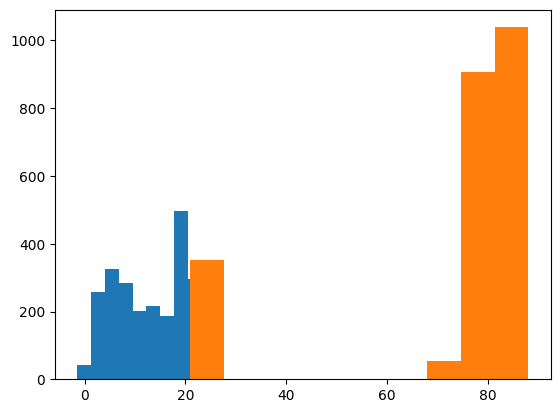

In [62]:
plt.hist(ma_Rome),plt.hist(ma_Bangkok)

In [63]:
import seaborn as sns

<AxesSubplot: >

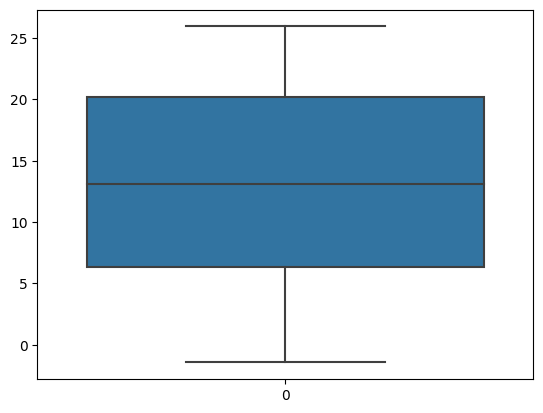

In [75]:
sns.boxplot([ma_Rome])
#sns.boxplot([ma_Bangkok]) #They have different scales

<AxesSubplot: >

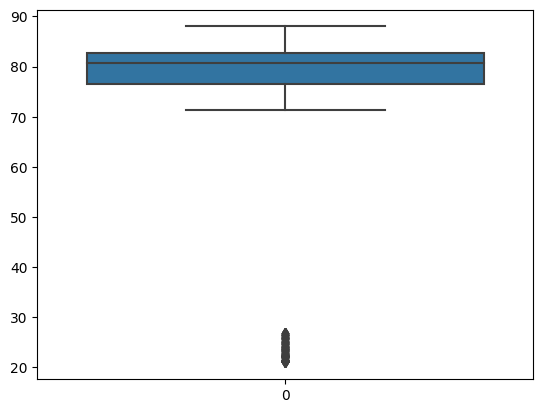

In [76]:
sns.boxplot([ma_Bangkok]) #Bangkok have outliers

In [84]:
data = GLT['AverageTemperature']
min_val = data.min()
max_val = data.max()
normalized_data = (data - min_val) / (max_val - min_val)
GLT['AverageTemperature']=normalized_data
print(normalized_data)

0         0.465904
1         0.472264
2         0.469084
3         0.460990
4         0.454778
            ...   
219570    0.441344
219571    0.381603
219572    0.341273
219573    0.274510
219574    0.226087
Name: AverageTemperature, Length: 219575, dtype: float64


In [85]:
ma_Rome=GLT[GLT['City']=='Rome']['AverageTemperature']
ma_Bangkok=GLT[GLT['City']=='Bangkok']['AverageTemperature']

(<AxesSubplot: >, <AxesSubplot: >)

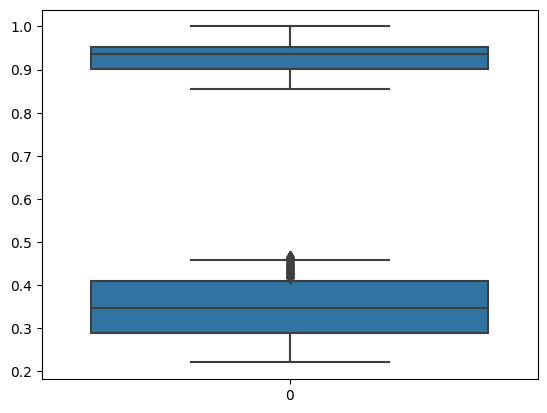

In [86]:
sns.boxplot([ma_Rome]),sns.boxplot([ma_Bangkok]) 